In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [6]:
Receipts= pd.read_excel('../MunchieProject/Data/Receipts.xlsx')

In [9]:
Receipts

,Description,Date,Supplier,Order Qty,Unit,Measure,Price,Per/Unit,Total Order
0,Cheese-provolon,2023-10-24,Sam's,1.0,LB,2.0,7.48,3.740000,7.48
1,Mushrooms,2023-10-24,Sam's,1.0,OZ,24.0,4.18,0.174167,4.18
2,Bread-Buns,2023-10-24,Sam's,2.0,Each,16.0,3.78,0.236250,7.56
3,lettuce,2023-10-24,Sam's,1.0,Head,2.0,2.28,1.140000,2.28
4,Fries,2023-10-21,Sam's,2.0,LB,30.0,34.48,1.149333,68.96
...,...,...,...,...,...,...,...,...,...
314,Chicken-Wings,2023-10-27,Costellos,1.0,LB,40.0,115.00,2.875000,115.00
315,Pickles,2023-11-04,Grocery Advantage,3.0,0,0.0,4.87,NaN,14.61
316,Bread-Philly,2023-11-03,JimmyJohns,1.0,Count,4.0,1.98,0.495000,1.98
317,Bread-Philly,2023-11-02,JimmyJohns,1.0,Count,8.0,2.94,0.367500,2.94


In [11]:
Receipts.groupby('Date')['Total Order'].sum()

Date
2023-08-21     58.9900
2023-08-22    172.3600
2023-08-23     38.9300
2023-08-24    128.3800
2023-08-25     28.5200
2023-08-26     22.5600
2023-08-28    207.7400
2023-08-29    155.9100
2023-08-30    226.4680
2023-08-31    239.3906
2023-09-01    662.8800
2023-09-02     94.8600
2023-09-04    144.5600
2023-09-05    212.2000
2023-09-06    165.1600
2023-09-07     27.7290
2023-09-08     47.0962
2023-09-09     84.4300
2023-09-11     87.6100
2023-09-12    163.4400
2023-09-13    105.0000
2023-09-14    255.0400
2023-09-15    153.6944
2023-09-16    165.2128
2023-09-20    209.7354
2023-09-21     83.3600
2023-09-22    125.3816
2023-09-23    839.7000
2023-09-25     38.1900
2023-09-26    133.0937
2023-09-27    251.8900
2023-09-28     56.4894
2023-09-29     10.5000
2023-09-30    167.4600
2023-10-02    167.4000
2023-10-03    250.7300
2023-10-04     90.7200
2023-10-05    204.9900
2023-10-06    105.8404
2023-10-07    138.2968
2023-10-09      7.4400
2023-10-10     71.5720
2023-10-11    533.8918
2023-1

In [68]:
Sales= pd.read_excel('BOOKS.xlsx',
                sheet_name=['Revenue'])

In [70]:
Sales

{'Revenue':           Date  Ticket#     Item  Quanity  Price
 0   2023-08-21  1072-19    Wings      6.0    9.0
 1   2023-08-21  1072-19  W/Fries      1.0    2.0
 2   2023-08-21  1072-20   Philly      1.0   14.0
 3   2023-08-21  1072-21   Burger      1.0    9.0
 4   2023-08-21  1072-21  W/Fries      1.0    2.0
 ..         ...      ...      ...      ...    ...
 848 2023-09-23  1714-16   6Wings      2.0   22.0
 849 2023-09-23  1714-17  10Wings      1.0   17.0
 850 2023-09-23  1714-18   Philly      1.0   16.0
 851 2023-09-23  1714-18    nacho      1.0    4.0
 852 2023-09-23  1714-18  Add-Jal      2.0    1.0
 
 [853 rows x 5 columns]}

In [47]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     853 non-null    datetime64[ns]
 1   Ticket#  853 non-null    object        
 2   Item     853 non-null    object        
 3   Quanity  853 non-null    float64       
 4   Price    853 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 33.4+ KB


In [48]:
Sales.groupby('Date').sum()

C:\Users\dell\AppData\Local\Temp\ipykernel_8052\3445868713.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sales.groupby('Date').sum()


,Quanity,Price
Date,,
2023-08-21,61.000,166.0000
2023-08-22,80.000,178.0000
2023-08-23,73.000,187.5000
2023-08-24,98.000,215.0000
2023-08-25,110.000,282.6600
2023-08-26,36.668,257.0040
2023-08-28,32.000,217.0000
2023-08-29,42.500,295.0000
2023-08-30,24.000,172.0000


In [63]:
Item=Sales.groupby('Item').sum()

C:\Users\dell\AppData\Local\Temp\ipykernel_8052\3127281248.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Item=Sales.groupby('Item').sum()


In [61]:
Sales['Price'].sum()

7550.6535

<AxesSubplot: >

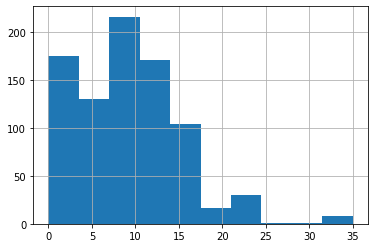

In [43]:
Sales['Price'].hist()